In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
%matplotlib inline

In [2]:
pd.set_option('max_columns',None)

In [3]:
df = pd.read_csv('./diabetic_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [14]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.isnull().values.any()

False

In [7]:
description=df.describe()

In [8]:
description

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


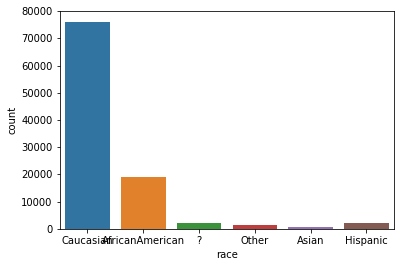

In [35]:
sns.countplot(x='race',data=df)

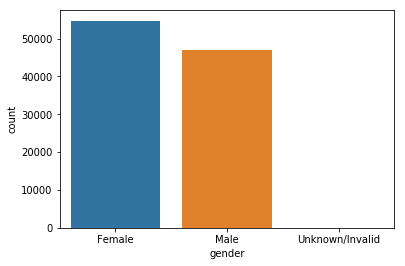

In [36]:
sns.countplot(x='gender',data=df)

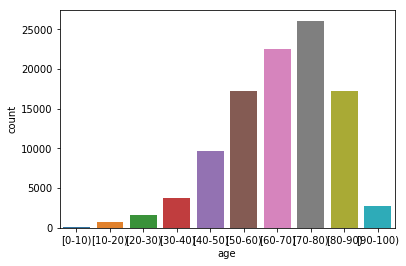

In [52]:
sns.countplot(x='age',data=df)

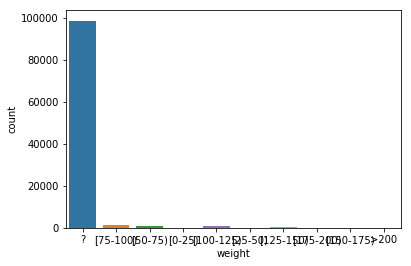

In [37]:
sns.countplot(x='weight',data=df)

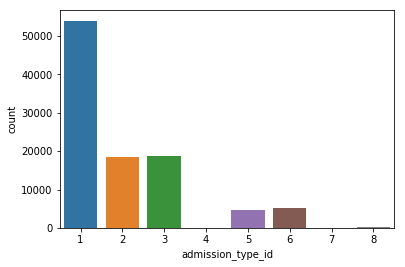

In [15]:
sns.countplot(x='admission_type_id',data=df)

1 - Emergency  
2 - Urgent  
3 - Elective  
4 - Newborn  
5 - Trauma center  
See IDs_mapping

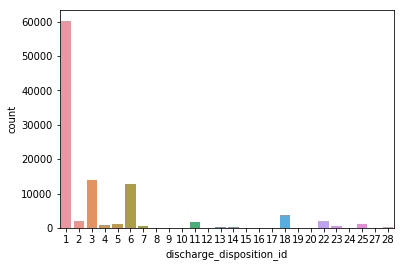

In [16]:
sns.countplot(x='discharge_disposition_id',data=df)

1 - Discharged to home  
2 - To other hospital  
3 - To nursing facility  
4 - To intermediate care facility  
5 - To another type of institution for inpatient care  
6 - To home care of organized home health service organization  
7 - Left against medical advice or discontinued care  
8 - To home with IV drug provider  
9 - Admitted as an inpatient to this hospital  
20 - Expired  
See IDs_mapping

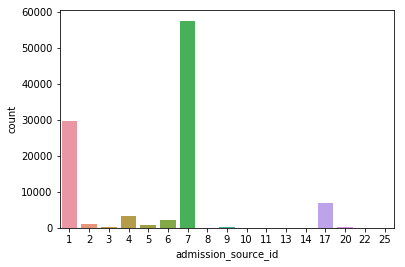

In [17]:
sns.countplot(x='admission_source_id',data=df)

1 - Physician Referral  
2 - Admitted by recommendation of this facility's clinic physician  
3 - HMO referral  
4 - Transfer from different facility  
5 - Transfer from SNF or ICF  
6 - Transfer from another health care facility  
7 - Emergency room  
8 - Court/law enforcement  
9 - Not available  
See IDs_mapping

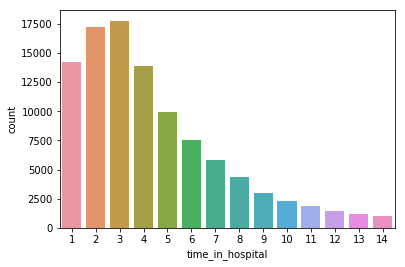

In [38]:
sns.countplot(x='time_in_hospital',data=df)

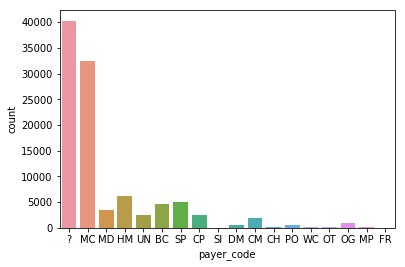

In [18]:
sns.countplot(x='payer_code',data=df)

MC - Medicare  
MD - Medicaid  
HM - Health Maintenance Organization  
BC - Blue Cross??  
SP - Self Pay  
CH - CHAMPUS  
Look for more later

In [39]:
df.loc[:,'medical_specialty'].value_counts()

?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

May want to break down specialties into coarser categories later

/home/joele119/anaconda2/envs/data_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


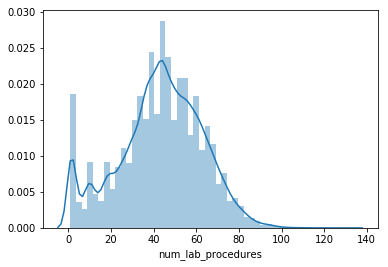

In [55]:
sns.distplot(df['num_lab_procedures'])

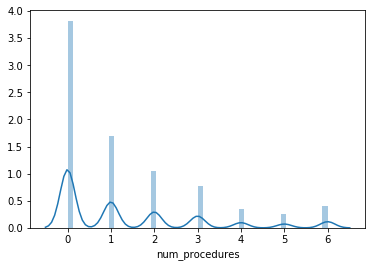

In [56]:
sns.distplot(df['num_procedures'])

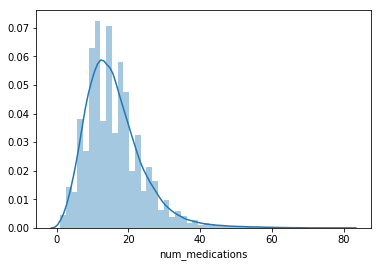

In [57]:
sns.distplot(df['num_medications'])

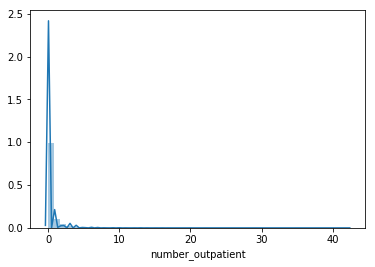

In [58]:
sns.distplot(df['number_outpatient'])

In [171]:
# df['number_outpatient'].value_counts()

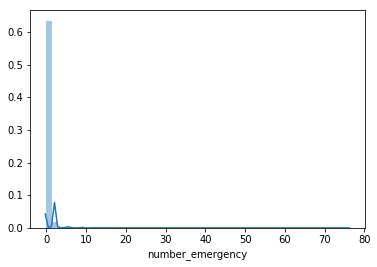

In [59]:
sns.distplot(df['number_emergency'])

In [170]:
# df['number_emergency'].value_counts()

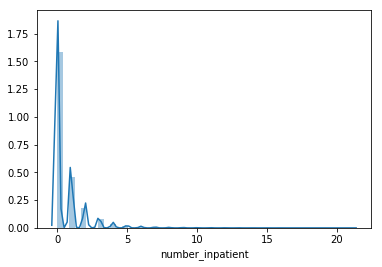

In [60]:
sns.distplot(df['number_inpatient'])

In [169]:
# df['number_inpatient'].value_counts()

Some serious outliers in number of visits

In [168]:
# sns.countplot(x='diag_3',data=df)

The above should maybe be converted into a more concise categorical variable. I'll take a closer look.

In [165]:
# df.loc[:,'diag_1'].value_counts()

In [166]:
# df.loc[:,'diag_2'].value_counts()

In [167]:
# df.loc[:,'diag_3'].value_counts()

Yeah, I think I'll convert these into larger categories

In [77]:
# searchfor=['V','E']
# numeric_diag1=df['diag_1'][~(df['diag_1'].str.contains('|'.join(searchfor),regex=True))]
# numeric_diag2=df['diag_2'][~(df['diag_2'].str.contains('|'.join(searchfor),regex=True))]
# numeric_diag3=df['diag_3'][~(df['diag_3'].str.contains('|'.join(searchfor),regex=True))]

First, convert all V valued codes to 1000 and E valued codes to 2000

In [4]:
df.loc[:,'diag_1':'diag_3']=df.loc[:,'diag_1':'diag_3'].replace(regex={r'^V.*$':1250,r'^E.*$':2000})

In [5]:
df.loc[:,'diag_1':'diag_3']=df.loc[:,'diag_1':'diag_3'].apply(pd.to_numeric,errors='coerce')

In [6]:
df.loc[:,'diag_1':'diag_3']=df.loc[:,'diag_1':'diag_3'].fillna(0.5)

In [7]:
# df['diag_1'][df['diag_1'].str.contains('V',regex=False)]=1000
# df['diag_1'][df['diag_1'].str.contains('E',regex=False)]=2000

In [8]:
df['diag_1_code']=pd.cut(df['diag_3'],[0,1,140,240,280,290,320,390,460,520,580,630,680,710,740,760,780,800,1000,1500,2000], \
      labels=['Unknown','ID','Neo','ENMID','Blood','Ment','Nerv','Circ','Resp','Dig','Gen-ur','Preg','Skin','Musc','Congen','Perin','Symp','Inj','Supp-fac','Supp-ext'])
df['diag_2_code']=pd.cut(df['diag_3'],[0,1,140,240,280,290,320,390,460,520,580,630,680,710,740,760,780,800,1000,1500,2000], \
      labels=['Unknown','ID','Neo','ENMID','Blood','Ment','Nerv','Circ','Resp','Dig','Gen-ur','Preg','Skin','Musc','Congen','Perin','Symp','Inj','Supp-fac','Supp-ext'])
df['diag_3_code']=pd.cut(df['diag_3'],[0,1,140,240,280,290,320,390,460,520,580,630,680,710,740,760,780,800,1000,1500,2000], \
      labels=['Unknown','ID','Neo','ENMID','Blood','Ment','Nerv','Circ','Resp','Dig','Gen-ur','Preg','Skin','Musc','Congen','Perin','Symp','Inj','Supp-fac','Supp-ext'])

In [9]:
df['diag_3_code'].isnull().values.any()

False

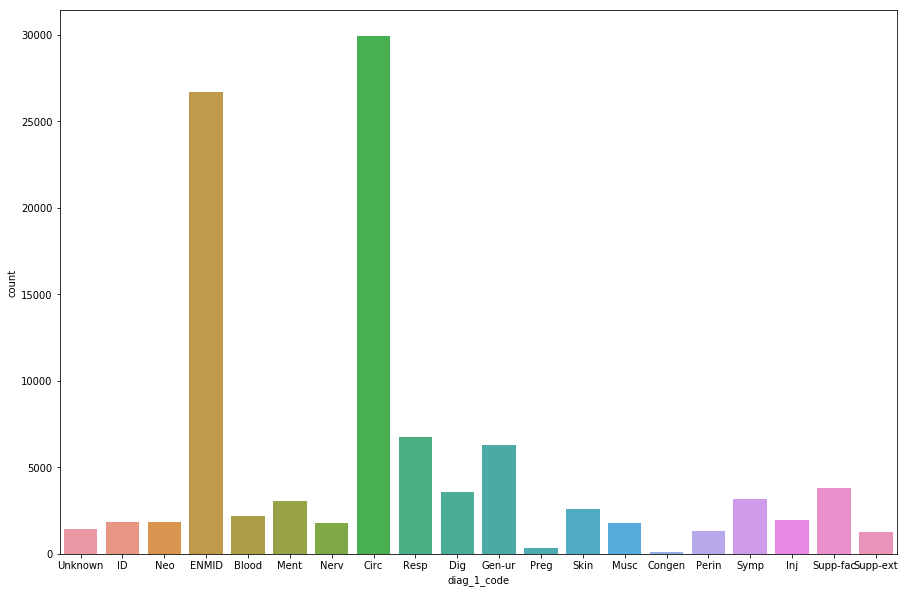

In [10]:
fig,ax=plt.subplots(figsize=(15,10))
sns.countplot(ax=ax,x='diag_1_code',data=df)

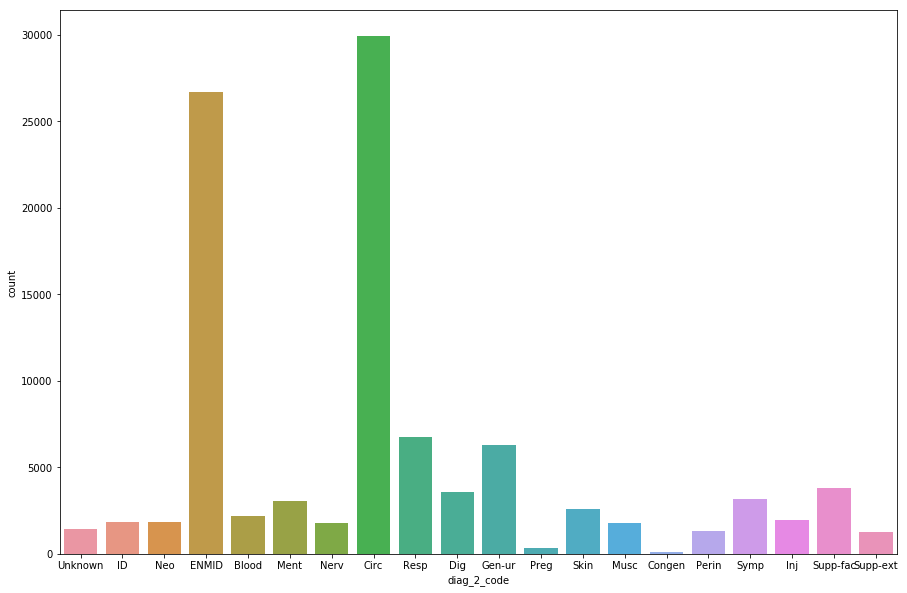

In [163]:
fig,ax=plt.subplots(figsize=(15,10))
sns.countplot(ax=ax,x='diag_2_code',data=df)

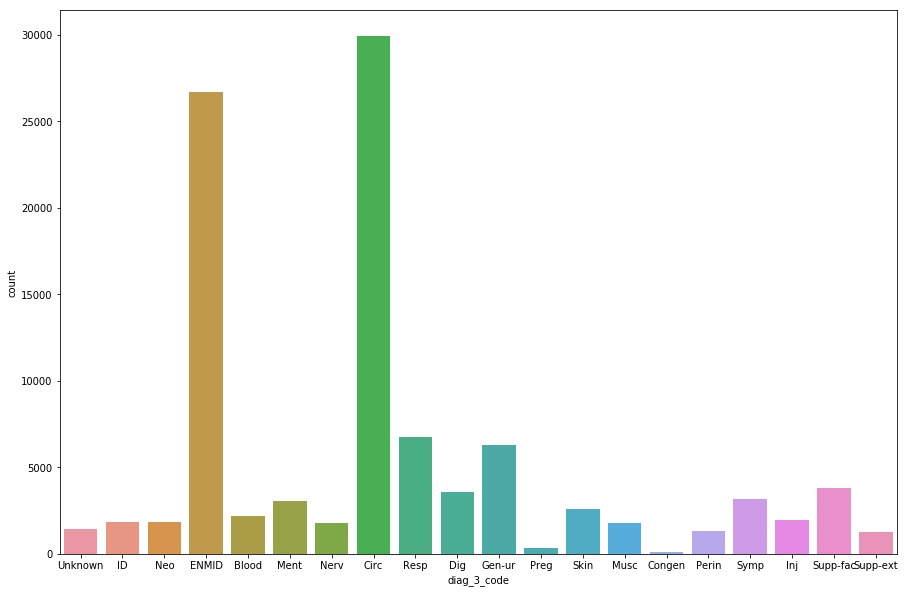

In [164]:
fig,ax=plt.subplots(figsize=(15,10))
sns.countplot(ax=ax,x='diag_3_code',data=df)

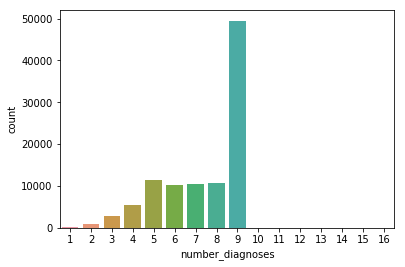

In [49]:
sns.countplot(x='number_diagnoses',data=df)

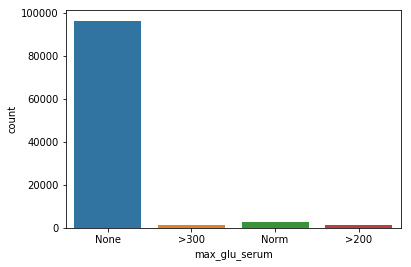

In [50]:
sns.countplot(x='max_glu_serum',data=df)

	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

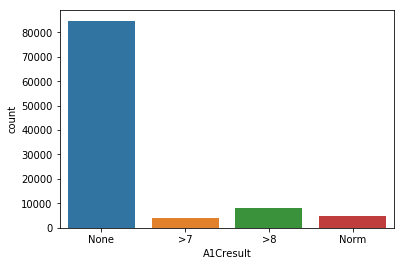

In [51]:
sns.countplot(x='A1Cresult',data=df)

Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

In [14]:
df.loc[:,'metformin':'metformin-pioglitazone'].apply(pd.Series.value_counts)

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
Down,575,45,11,1,194,NaN,560,564,NaN,118,87,3,5,NaN,NaN,NaN,NaN,12218,6,NaN,NaN,NaN,NaN
No,81778,100227,101063,101680,96575,101765.0,89080,91116,101743.0,94438,95401,101458,101728,101763.0,101727.0,101766.0,101766.0,47383,101060,101753.0,101765.0,101764.0,101765.0
Steady,18346,1384,668,79,4670,1.0,11356,9274,23.0,6976,6100,295,31,3.0,38.0,NaN,NaN,30849,692,13.0,1.0,2.0,1.0
Up,1067,110,24,6,327,NaN,770,812,NaN,234,178,10,2,NaN,1.0,NaN,NaN,11316,8,NaN,NaN,NaN,NaN


the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

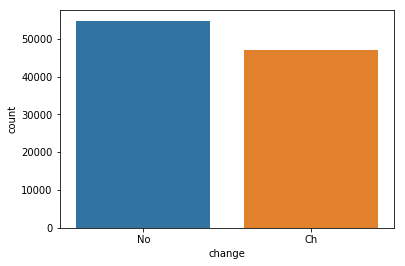

In [41]:
sns.countplot(x='change',data=df)

Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

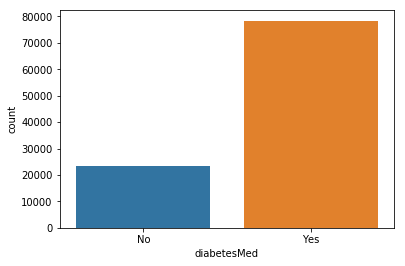

In [44]:
sns.countplot(x='diabetesMed',data=df)

Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

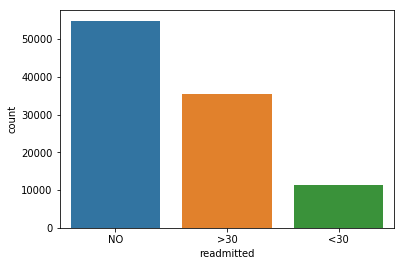

In [45]:
sns.countplot(x='readmitted',data=df)

Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.

Do we ever encounter the same patient more than once?

In [13]:
df['patient_nbr'].value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
23643405     22
84428613     22
92709351     21
23398488     20
90609804     20
88789707     20
37096866     20
89472402     20
29903877     20
88681950     19
88479036     19
97391007     19
24011577     18
3481272      18
91160280     18
84348792     18
3401055      18
91751121     18
106757478    17
90489195     17
41699412     17
84676248     16
384939       16
90164655     16
41617368     16
             ..
141459593     1
54207855      1
71579169      1
23406147      1
6348348       1
137952824     1
23234103      1
78943797      1
43683723      1
85241394      1
18267696      1
45161577      1
32417442      1
61105707      1
106231896     1
3397149       1
39734766      1
23850522      1
42977016      1
113160366     1
8105490       1
16600590      1
92990970      1
783198        1
105551478     1
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Lengt

What are some interesting questions we can ask about this data set?
* What are the chances of being readmitted?
* Can we predict a change in diabetes medication?
* Is the cost of HbA1C test worth the decrease in patient readmissions? (Need data on cost of test and average cost of patient readmission)
* Does type of doctor predict whether the test was administered? (need to coarse grain doctors)
* 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 53 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

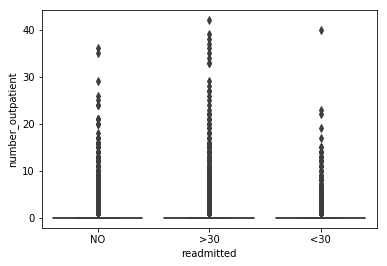

In [19]:
sns.boxplot(x='readmitted',y='number_outpatient',data=df)

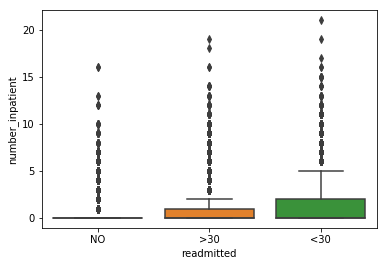

In [20]:
sns.boxplot(x='readmitted',y='number_inpatient',data=df)

If you've been an inpatient once already, you probably will be again. Especially if you've already had a lot of inpatient visits that year.

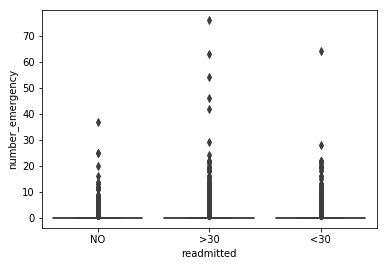

In [21]:
sns.boxplot(x='readmitted',y='number_emergency',data=df)

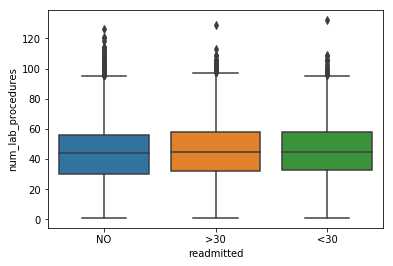

In [22]:
sns.boxplot(x='readmitted',y='num_lab_procedures',data=df)

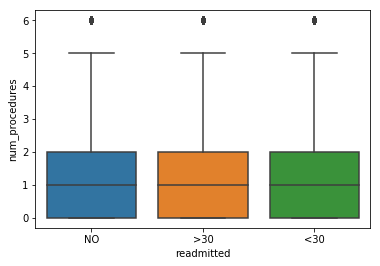

In [23]:
sns.boxplot(x='readmitted',y='num_procedures',data=df)

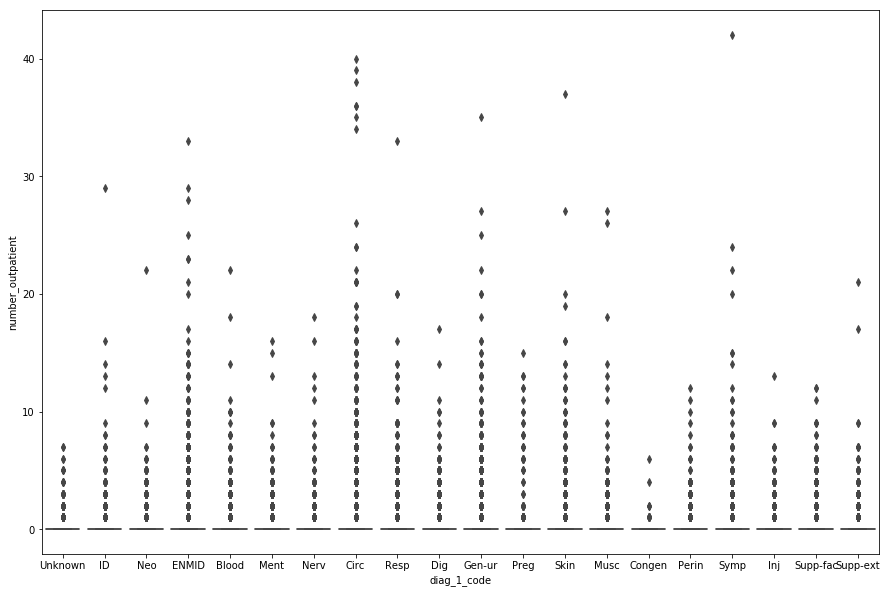

In [27]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(x='diag_1_code',y='number_outpatient',data=df)

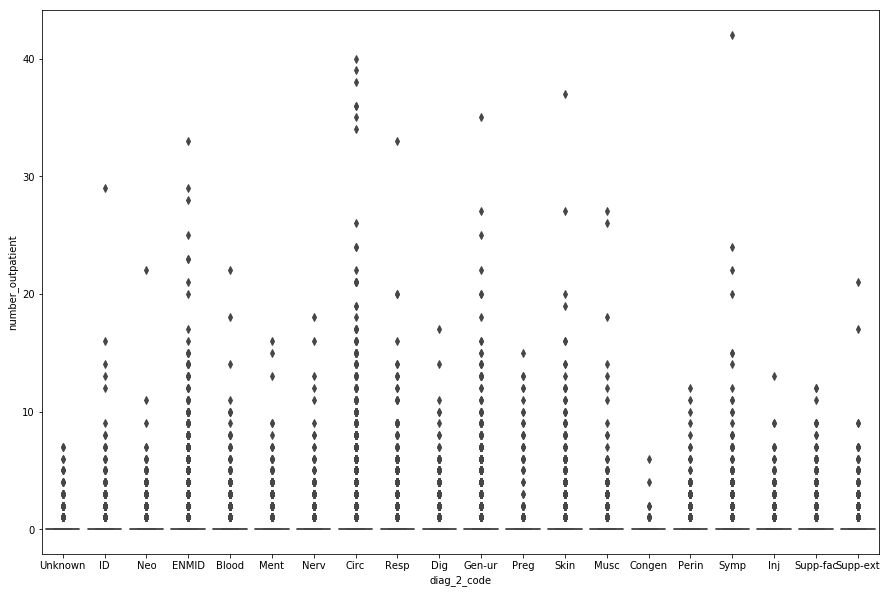

In [28]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(x='diag_2_code',y='number_outpatient',data=df)

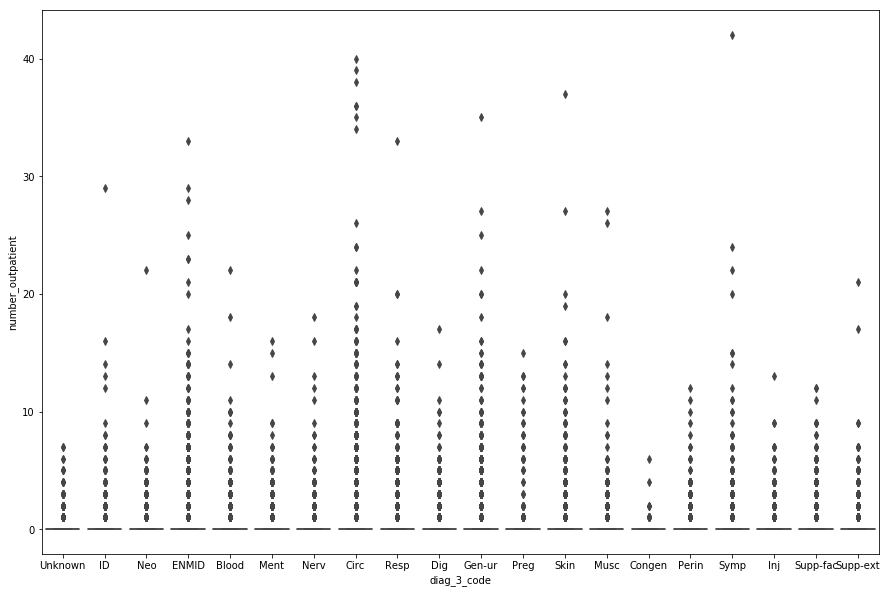

In [29]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(x='diag_3_code',y='number_outpatient',data=df)

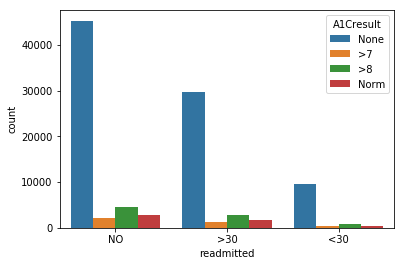

In [35]:
sns.countplot(x='readmitted',hue='A1Cresult',data=df)

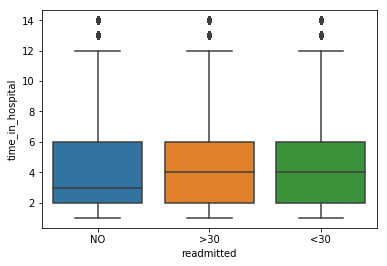

In [37]:
sns.boxplot(x='readmitted',y='time_in_hospital',data=df)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 53 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

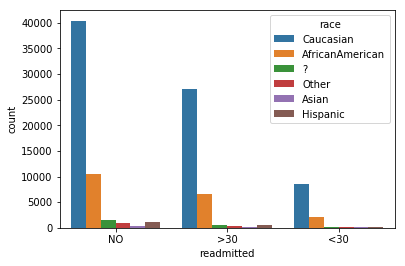

In [41]:
sns.countplot(x='readmitted',hue='race',data=df)

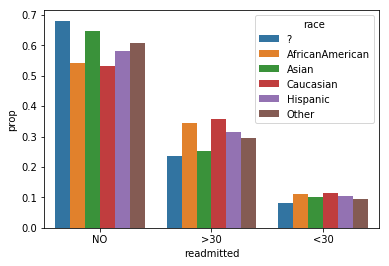

In [57]:
x,y,hue='readmitted','prop','race'
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)

In [58]:
prop_df

,race,readmitted,prop
0,?,NO,0.680598
1,?,>30,0.236692
2,?,<30,0.082710
3,AfricanAmerican,NO,0.542478
4,AfricanAmerican,>30,0.345341
5,AfricanAmerican,<30,0.112181
6,Asian,NO,0.647426
7,Asian,>30,0.251170
8,Asian,<30,0.101404
9,Caucasian,NO,0.530664


Need to look at frequency, rather than total count

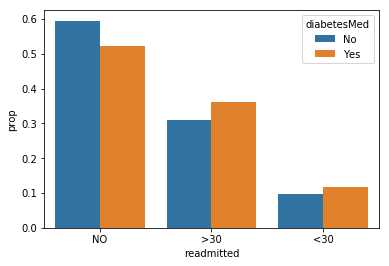

In [60]:
x,y,hue='readmitted','prop','diabetesMed'
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)


In words: 60% of those not prescribed a diabetes medication were not later readmitted, 30% were readmitted in more than 30 days and 10% were readmitted before the month was up.

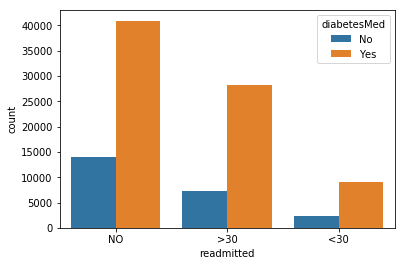

In [61]:
sns.countplot(x='readmitted',hue='diabetesMed',data=df)

In [62]:
prop_df

,diabetesMed,readmitted,prop
0,No,NO,0.595223
1,No,>30,0.308807
2,No,<30,0.095971
3,Yes,NO,0.522364
4,Yes,>30,0.361370
5,Yes,<30,0.116267


Now we need to perform one-hot encoding

In [17]:
import sklearn.preprocessing as preprocessing

In [11]:
def one_hot(df,cols):
    for each in cols:
        dummies = pd.get_dummies(df[each],prefix=each,drop_first=False)
        df = pd.concat([df,dummies],axis=1)
    return df

In [53]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [166]:
from sklearn.preprocessing import MinMaxScaler

def transform_diab(df,downsample=True):
    cols=df.select_dtypes([object,'category']).columns

    dummy_df=one_hot(df,cols)

    dummy_df.drop(columns=list(set(cols)-set(['readmitted'])),inplace=True)

    dummy_df.drop(columns=['encounter_id','patient_nbr'],inplace=True)

    dummy_df=one_hot(dummy_df,['admission_type_id','discharge_disposition_id','admission_source_id'])

    dummy_df.drop(columns=['admission_type_id','discharge_disposition_id','admission_source_id','diag_1','diag_2','diag_3'],inplace=True)
    
    if downsample:
        g = dummy_df.groupby('readmitted')
        dummy_df=g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)
        
    le=preprocessing.LabelEncoder()
    readmit=le.fit_transform(dummy_df['readmitted'])
        
    dummy_df.drop(columns=['readmitted_NO','readmitted_>30','readmitted_<30','readmitted'],inplace=True)
    scaler=MinMaxScaler()
    dummy_df.loc[:,'time_in_hospital':'number_diagnoses']=scaler.fit_transform(dummy_df.loc[:,'time_in_hospital':'number_diagnoses'])
    return dummy_df,readmit

Let's try out some logistic regression now

In [69]:
import sklearn.linear_model as lm
import sklearn.metrics as met

In [144]:
logreg = lm.LogisticRegression()

In [138]:
from sklearn.model_selection import GridSearchCV

In [126]:
dummy_df,readmit=transform_diab(df)

In [127]:
dummy_df.head(10)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),weight_>200,weight_?,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100),payer_code_?,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,medical_specialty_?,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Cardiology,medical_specialty_Cardiology-Pediatric,medical_specialty_DCPTEAM,medical_specialty_Dentistry,medical_specialty_Dermatology,medical_specialty_Emergency/Trauma,medical_specialty_Endocrinology,medical_specialty_Endocrinology-Metabolism,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_Hematology/Oncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_Neurophysiology,medical_specialty_Obsterics&Gynecology-GynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_OutreachServices,medical_specialty_Pathology,medical_specialty_Pediatrics,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Pediatrics-EmergencyMedicine,medical_specialty_Pediatrics-Endocrinology,medical_specialty_Pediatrics-Hematology-Oncology,medical_specialty_Pediatrics-InfectiousDiseases,medical_specialty_Pediatrics-Neurology,medical_specialty_Pediatrics-Pulmonology,medical_specialty_Perinatology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_PhysicianNotFound,medical_specialty_Podiatry,medical_specialty_Proctology,medical_specialty_Psychiatry,medical_specialty_Psychiatry-Addictive,medical_specialty_Psychiatry-Child/Adolescent,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Resident,medical_specialty_Rheumatology,medical_specialty_Speech,medical_specialty_SportsMedicine,medical_specialty_Surgeon,medical_specialty_Surgery-Cardiovascular,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-Colon&Rectal,medical_specialty_Surgery-General,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutami

In [128]:
pd.Series(readmit).value_counts()

2    11357
1    11357
0    11357
dtype: int64

In [145]:
param_grid = {'C': [0.0001, 0.001, 0.01, 1, 10], 
              'penalty': ['l1','l2']}
gs = GridSearchCV(estimator=logreg, 
                  param_grid=param_grid, 
                  cv=3)

In [148]:
gs.fit(dummy_df,readmit)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [151]:
gs.best_score_

0.4638548912564938

In [161]:
all_dummy,all_readmit=transform_diab(df,downsample=False)

In [163]:
pred=gs.predict(all_dummy)

In [167]:
pd.Series(pred).value_counts()

2    46203
1    30931
0    24632
dtype: int64

In [164]:
print met.confusion_matrix(all_readmit,pred)

[[ 5010  3246  3101]
 [ 9884 14068 11593]
 [ 9738 13617 31509]]


In [165]:
print met.classification_report(all_readmit,pred)

             precision    recall  f1-score   support

          0       0.20      0.44      0.28     11357
          1       0.45      0.40      0.42     35545
          2       0.68      0.57      0.62     54864

avg / total       0.55      0.50      0.52    101766



In [155]:
le.classes_

array(['<30', '>30', 'NO'], dtype=object)

Let's try a quick random forest:

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf=RandomForestClassifier(n_estimators=200,max_features='sqrt')

In [178]:
param_grid = {'n_estimators': [10,20,50,100,200,400], 
              'max_features': ['auto','sqrt']}
grf = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  cv=3,verbose=3)

In [179]:
grf.fit(dummy_df,readmit)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_features=auto, n_estimators=10 ..............................
[CV]  max_features=auto, n_estimators=10, score=0.410019369607, total=   0.6s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_features=auto, n_estimators=10, score=0.406937841169, total=   0.6s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  max_features=auto, n_estimators=10, score=0.40510788199, total=   0.6s
[CV] max_features=auto, n_estimators=20 ..............................
[CV]  max_features=auto, n_estimators=20, score=0.423842225744, total=   1.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV]  max_features=auto, n_estimators=20, score=0.433879204085, total=   1.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV]  max_features=auto, n_estimators=20, score=0.422545134302, total=   1.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV]  max_features=auto, n_estimators=50, score=0.446909667195, total=   2.7s
[CV] max_features=auto, n_estimators=50 ..............................
[CV]  max_features=auto, n_estimators=50, score=0.444884662793, total=   2.7s
[CV] max_features=auto, n_estimators=50 ..............................
[CV]  max_features=auto, n_estimators=50, score=0.451519154557, total=   2.7s
[CV] max_features=auto, n_est

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 400], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [180]:
grf.best_score_

0.46053828769334626

In [184]:
grf.best_params_

{'max_features': 'sqrt', 'n_estimators': 200}

In [181]:
pred=grf.predict(all_dummy)

In [183]:
print met.classification_report(all_readmit,pred)

             precision    recall  f1-score   support

          0       0.40      1.00      0.57     11357
          1       0.65      0.58      0.61     35545
          2       0.83      0.63      0.72     54864

avg / total       0.72      0.65      0.66    101766



In [185]:
from sklearn.model_selection import cross_val_score

In [192]:
cross_val_score(rf,all_dummy,all_readmit,scoring='f1_micro')

array([0.55970875, 0.56582749, 0.57230034])

Not a particularly awesome F1-score. Let's try adding more features now:

In [157]:
import featuretools as ft

In [162]:
all_dummy.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),weight_>200,weight_?,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100),payer_code_?,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,medical_specialty_?,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Cardiology,medical_specialty_Cardiology-Pediatric,medical_specialty_DCPTEAM,medical_specialty_Dentistry,medical_specialty_Dermatology,medical_specialty_Emergency/Trauma,medical_specialty_Endocrinology,medical_specialty_Endocrinology-Metabolism,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_Hematology/Oncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_Neurophysiology,medical_specialty_Obsterics&Gynecology-GynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_OutreachServices,medical_specialty_Pathology,medical_specialty_Pediatrics,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Pediatrics-EmergencyMedicine,medical_specialty_Pediatrics-Endocrinology,medical_specialty_Pediatrics-Hematology-Oncology,medical_specialty_Pediatrics-InfectiousDiseases,medical_specialty_Pediatrics-Neurology,medical_specialty_Pediatrics-Pulmonology,medical_specialty_Perinatology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_PhysicianNotFound,medical_specialty_Podiatry,medical_specialty_Proctology,medical_specialty_Psychiatry,medical_specialty_Psychiatry-Addictive,medical_specialty_Psychiatry-Child/Adolescent,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Resident,medical_specialty_Rheumatology,medical_specialty_Speech,medical_specialty_SportsMedicine,medical_specialty_Surgeon,medical_specialty_Surgery-Cardiovascular,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-Colon&Rectal,medical_specialty_Surgery-General,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutami

Let's try to do some dimensionality reduction / feature selection and re-run these ensemble learners

In [15]:
import sklearn.decomposition as dec

In [19]:
pca=dec.PCA(n_components=5)

In [20]:
pca.fit(dummy_df)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

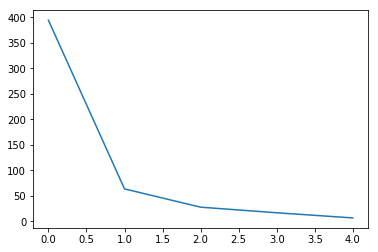

In [21]:
plt.plot(pca.explained_variance_)

In [22]:
pca.explained_variance_

array([ 394.00842321,   63.32870818,   27.45104312,   16.46832734,
          6.38626597])

Let's use the first 10 of these, then, and see how that does

In [23]:
pca=dec.PCA(n_components=5)

In [24]:
new_df=pca.fit_transform(dummy_df)

In [25]:
new_df.shape

(101766, 5)

Perfect. Let's try running our ensemble methods, then.

In [191]:
import sklearn.linear_model as lm
import sklearn.ensemble as ens
import sklearn.model_selection as ms
# For a quick, out of the box comparison of classification methods, 
# just to see if any of them work well without any tweaking
# Performs cross-validation on each estimator
def quick_classify_compare(X,y):
    scores=[]
    logreg=lm.LogisticRegression()
#     logreg.fit(X,y)
    scores.append(ms.cross_val_score(logreg,X,y))
    rf=ens.RandomForestClassifier()
#     rf.fit(X,y)
#     scores.append(rf.score(X,y))
    scores.append(ms.cross_val_score(rf,X,y))
    gb=ens.GradientBoostingClassifier()
#     gb.fit(X,y)
#     scores.append(gb.score(X,y))
    scores.append(ms.cross_val_score(gb,X,y))
    ada=ens.AdaBoostClassifier()
#     ada.fit(X,y)
#     scores.append(ada.score(X,y))
    scores.append(ms.cross_val_score(ada,X,y))
    bag=ens.BaggingClassifier()
#     bag.fit(X,y)
#     scores.append(bag.score(X,y))
    scores.append(ms.cross_val_score(bag,X,y))
    xt=ens.ExtraTreesClassifier()
#     xt.fit(X,y)
#     scores.append(xt.score(X,y))
    scores.append(ms.cross_val_score(xt,X,y))
    return scores
    # Plotting
    

In [193]:
scores=quick_classify_compare(dummy_df,readmit)

In [194]:
scores

[array([ 0.55873596,  0.556512  ,  0.57365644]),
 array([ 0.5411078 ,  0.52426154,  0.50759117]),
 array([ 0.56489697,  0.56939449,  0.58695204]),
 array([ 0.56068154,  0.56688874,  0.58264792]),
 array([ 0.53394452,  0.52069453,  0.51095192]),
 array([ 0.52993544,  0.51052414,  0.50042746])]

Using only PCs

In [192]:
scores

[array([ 0.55935501,  0.55683627,  0.57949353]),
 array([ 0.53703977,  0.51238135,  0.49691931]),
 array([ 0.56589924,  0.56355757,  0.57837328]),
 array([ 0.56062259,  0.55777961,  0.57622122]),
 array([ 0.53023023,  0.50860798,  0.49288052]),
 array([ 0.53872004,  0.50961028,  0.49630023])]

Let's see how well PCA and LDA can separate these classes

In [198]:
import sklearn.discriminant_analysis as DA
pca=dec.PCA(n_components=2)
X_pca=pca.fit_transform(dummy_df)
lda=DA.LinearDiscriminantAnalysis(n_components=2)
X_lda=lda.fit_transform(dummy_df,readmit)

/home/joele119/anaconda2/envs/data_env/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


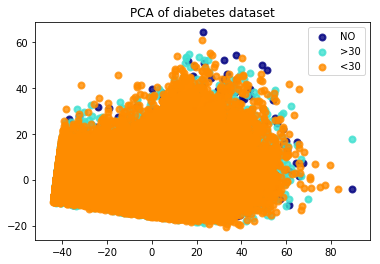

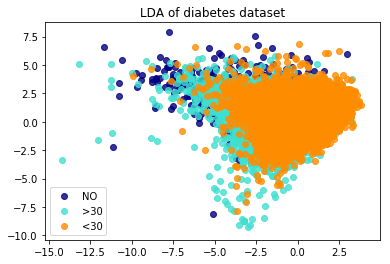

In [204]:
target_names=df['readmitted'].unique()

plt.figure()
target_names=df['readmitted'].unique()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
y=readmit
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of diabetes dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of diabetes dataset')

plt.show()

In [203]:
X_pca.shape

(101766, 2)

Let's try using the LDA to find PCs, then perform quick_classify_compare

In [210]:
lda=DA.LinearDiscriminantAnalysis(n_components=2)
X_lda=lda.fit_transform(dummy_df,readmit)

In [206]:
scores=quick_classify_compare(X_lda,readmit)

In [207]:
scores

[array([ 0.57344574,  0.5662402 ,  0.58205831]),
 array([ 0.50254989,  0.49121514,  0.49178975]),
 array([ 0.57315096,  0.56579801,  0.58196987]),
 array([ 0.57341627,  0.56712458,  0.58155715]),
 array([ 0.49963152,  0.49195213,  0.48577577]),
 array([ 0.49765646,  0.48891575,  0.48253294])]

Seems pretty similar, maybe a bit higher in some places

In [208]:
sgd=lm.SGDClassifier()
ms.cross_val_score(sgd,X_lda,readmit)

/home/joele119/anaconda2/envs/data_env/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 0.56887657,  0.55654148,  0.58017158])